In [285]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from itertools import combinations
from scipy.stats import ttest_ind
stud = pd.read_csv('stud_math.csv')


In [286]:
stud
stud.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               395 non-null    object 
 1   sex                  395 non-null    object 
 2   age                  395 non-null    int64  
 3   address              378 non-null    object 
 4   famsize              368 non-null    object 
 5   Pstatus              350 non-null    object 
 6   Medu                 392 non-null    float64
 7   Fedu                 371 non-null    float64
 8   Mjob                 376 non-null    object 
 9   Fjob                 359 non-null    object 
 10  reason               378 non-null    object 
 11  guardian             364 non-null    object 
 12  traveltime           367 non-null    float64
 13  studytime            388 non-null    float64
 14  failures             373 non-null    float64
 15  schoolsup            386 non-null    obj

будем рассматривать каждый столбец по отдельности

In [287]:
#school — аббревиатура школы, в которой учится ученик

display(pd.DataFrame(stud.school.value_counts()))
stud.loc[:, ['school']].info()

#хороший столбец, потом можно будет сравнить как выбранная школа влияет на успеваемость. Оставляем его без изменений

,school
GP,349
MS,46


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   school  395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [288]:
# sex — пол ученика ('F' - женский, 'M' - мужской)

display(pd.DataFrame(stud.sex.value_counts()))
stud.loc[:, ['sex']].info()

#оставляем без изменений

,sex
F,208
M,187


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   sex     395 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [289]:
#age — возраст ученика (от 15 до 22)

display(pd.DataFrame(stud.age.value_counts()))
stud.loc[:, ['age']].info()

#оставляем без изменений

,age
16,104
17,98
18,82
15,82
19,24
20,3
22,1
21,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   age     395 non-null    int64
dtypes: int64(1)
memory usage: 3.2 KB


In [290]:
#address — тип адреса ученика ('U' - городской, 'R' - за городом)

display(pd.DataFrame(stud.address.value_counts()))
stud.loc[:, ['address']].info()

#оставляем без изменений

,address
U,295
R,83


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   address  378 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [291]:
#famsize — размер семьи('LE3' <= 3, 'GT3' >3)

display(pd.DataFrame(stud.famsize.value_counts()))
stud.loc[:, ['famsize']].info()

#оставляем без изменений

,famsize
GT3,261
LE3,107


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   famsize  368 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [292]:
#Pstatus — статус совместного жилья родителей ('T' - живут вместе 'A' - раздельно)

display(pd.DataFrame(stud.Pstatus.value_counts()))
stud.loc[:, ['Pstatus']].info()

#оставляем без изменений

,Pstatus
T,314
A,36


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Pstatus  350 non-null    object
dtypes: object(1)
memory usage: 3.2+ KB


In [293]:
#Medu — образование матери (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

display(pd.DataFrame(stud.Medu.value_counts()))
stud.loc[:, ['Medu']].info()

#оставляем без изменений

,Medu
4.0,131
2.0,102
3.0,97
1.0,59
0.0,3


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Medu    392 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [294]:
#Fedu — образование отца (0 - нет, 1 - 4 класса, 2 - 5-9 классы, 3 - среднее специальное или 11 классов, 4 - высшее)

display(pd.DataFrame(stud.Fedu.value_counts()))
stud.loc[:, ['Fedu']].info()

#оставляем без изменений

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2
40.0,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    371 non-null    float64
dtypes: float64(1)
memory usage: 3.2 KB


In [295]:
#удалим строку со значением 40.0:

stud = stud.drop(np.where(stud['Fedu'] == 40.0)[0])

display(pd.DataFrame(stud.Fedu.value_counts()))
stud.loc[:, ['Fedu']].info()

#теперь столбец содержит только корректные значения

,Fedu
2.0,106
3.0,96
4.0,88
1.0,78
0.0,2


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Fedu    370 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [296]:
#Mjob — работа матери ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает,
#'other' - другое)

#Fjob — работа отца ('teacher' - учитель, 'health' - сфера здравоохранения, 'services' - гос служба, 'at_home' - не работает,
#'other' - другое)

display(pd.DataFrame(stud.Mjob.value_counts()))
stud.loc[:, ['Mjob']].info()    

display(pd.DataFrame(stud.Fjob.value_counts()))
stud.loc[:, ['Fjob']].info()

stud.Mjob = stud.Mjob.fillna('other') #заменим пустые значения на 'other'
stud.Fjob = stud.Fjob.fillna('other')



,Mjob
other,133
services,97
at_home,58
teacher,55
health,32


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Mjob    375 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


,Fjob
other,196
services,102
teacher,29
at_home,16
health,15


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Fjob    358 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [297]:
#reason — причина выбора школы ('home' - близость к дому, 'reputation' - репутация школы, 'course' - образовательная программа, 
#'other' - другое)

#guardian — опекун ('mother' - мать, 'father' - отец, 'other' - другое)

display(pd.DataFrame(stud.reason.value_counts()))
stud.loc[:, ['reason']].info()    

display(pd.DataFrame(stud.guardian.value_counts()))
stud.loc[:, ['guardian']].info()  


,reason
course,137
home,104
reputation,102
other,34


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   reason  377 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


,guardian
mother,250
father,85
other,28


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   guardian  363 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [298]:
#traveltime — время в пути до школы (1 - <15 мин., 2 - 15-30 мин., 3 - 30-60 мин., 4 - >60 мин.)

display(pd.DataFrame(stud.traveltime.value_counts()))
stud.loc[:, ['traveltime']].info()


,traveltime
1.0,242
2.0,96
3.0,21
4.0,7


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   traveltime  366 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [299]:
#studytime — время на учёбу помимо школы в неделю (1 - <2 часов, 2 - 2-5 часов, 3 - 5-10 часов, 4 - >10 часов)

display(pd.DataFrame(stud.studytime.value_counts()))
stud.loc[:, ['studytime']].info()

#failures — количество внеучебных неудач (n, если 1<=n<=3, иначе 0)

display(pd.DataFrame(stud.failures.value_counts()))
stud.loc[:, ['failures']].info()

#schoolsup — дополнительная образовательная поддержка (yes или no)

display(pd.DataFrame(stud.schoolsup.value_counts()))
stud.loc[:, ['schoolsup']].info()

#famsup — семейная образовательная поддержка (yes или no)

display(pd.DataFrame(stud.famsup.value_counts()))
stud.loc[:, ['famsup']].info()

,studytime
2.0,194
1.0,103
3.0,63
4.0,27


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   studytime  387 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


,failures
0.0,292
1.0,49
2.0,16
3.0,15


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   failures  372 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


,schoolsup
no,334
yes,51


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   schoolsup  385 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


,famsup
yes,218
no,137


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   famsup  355 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [300]:
#paid — дополнительные платные занятия по математике (yes или no)

display(pd.DataFrame(stud.paid.value_counts()))
stud.loc[:, ['paid']].info()

#activities — дополнительные внеучебные занятия (yes или no)

display(pd.DataFrame(stud.activities.value_counts()))
stud.loc[:, ['activities']].info()

#nursery — посещал детский сад (yes или no)

display(pd.DataFrame(stud.nursery.value_counts()))
stud.loc[:, ['nursery']].info()


,paid
no,199
yes,155


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   paid    354 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


,activities
yes,194
no,186


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   activities  380 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


,nursery
yes,299
no,79


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   nursery  378 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [301]:
#higher — хочет получить высшее образование (yes или no)

display(pd.DataFrame(stud.higher.value_counts()))
stud.loc[:, ['higher']].info()

#internet — наличие интернета дома (yes или no)

display(pd.DataFrame(stud.internet.value_counts()))
stud.loc[:, ['internet']].info()

#romantic — в романтических отношениях (yes или no)

display(pd.DataFrame(stud.romantic.value_counts()))
stud.loc[:, ['romantic']].info()


,higher
yes,355
no,19


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   higher  374 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


,internet
yes,304
no,56


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   internet  360 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


,romantic
no,239
yes,124


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   romantic  363 non-null    object
dtypes: object(1)
memory usage: 6.2+ KB


In [302]:
#famrel — семейные отношения (от 1 - очень плохо до 5 - очень хорошо)

display(pd.DataFrame(stud.famrel.value_counts()))
stud.loc[:, ['famrel']].info()



,famrel
4.0,182
5.0,98
3.0,62
2.0,17
1.0,7
-1.0,1


<class 'pandas.core.frame.DataFrame'>
Int64Index: 394 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  367 non-null    float64
dtypes: float64(1)
memory usage: 6.2 KB


In [303]:
#удаляем строку со значением -1,0:
stud.drop(stud[ stud['famrel'] == -1.0 ].index, inplace = True) 

display(pd.DataFrame(stud.famrel.value_counts()))
stud.loc[:, ['famrel']].info() #строка удалена

,famrel
4.0,182
5.0,98
3.0,62
2.0,17
1.0,7


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   famrel  366 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


In [304]:
#freetime — свободное время после школы (от 1 - очень мало до 5 - очень мого)

display(pd.DataFrame(stud.freetime.value_counts()))
stud.loc[:, ['freetime']].info()

#goout — проведение времени с друзьями (от 1 - очень мало до 5 - очень много)

display(pd.DataFrame(stud.goout.value_counts()))
stud.loc[:, ['goout']].info()

#health — текущее состояние здоровья (от 1 - очень плохо до 5 - очень хорошо)

display(pd.DataFrame(stud.health.value_counts()))
stud.loc[:, ['health']].info()

,freetime
3.0,153
4.0,112
2.0,61
5.0,38
1.0,18


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   freetime  382 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


,goout
3.0,127
2.0,99
4.0,84
5.0,52
1.0,23


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   goout   385 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


,health
5.0,137
3.0,89
4.0,62
1.0,47
2.0,43


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   health  378 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


,absences
0.0,111
2.0,60
4.0,52
6.0,31
8.0,21
10.0,17
12.0,12
14.0,11
3.0,8
16.0,7


<class 'pandas.core.frame.DataFrame'>
Int64Index: 393 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   absences  381 non-null    float64
dtypes: float64(1)
memory usage: 6.1 KB


count    381.000000
mean       7.270341
std       23.523737
min        0.000000
25%        0.000000
50%        4.000000
75%        8.000000
max      385.000000
Name: absences, dtype: float64

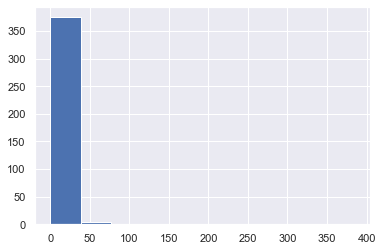

In [305]:
#absences — количество пропущенных занятий

display(pd.DataFrame(stud.absences.value_counts()))
stud.loc[:, ['absences']].info()
#очевидно, что кол-во пропущенных занятий влияет на успеваемость, поэтому этот столбец надо просмотреть детально
#посмотрим выбросы
stud.absences.hist()
stud.absences.describe()




In [306]:
#ищем выбросы
IQR = stud.absences.quantile(0.75) - stud.absences.quantile(0.25)
perc25 = stud.absences.quantile(0.25)
perc75 = stud.absences.quantile(0.75)
 
print(
'25-й перцентиль: {},'.format(perc25),
'75-й перцентиль: {},'.format(perc75),
"IQR: {}, ".format(IQR),
"Границы выбросов: [{f}, {l}].".format(f=perc25 - 1.5*IQR, l=perc75 + 1.5*IQR))

25-й перцентиль: 0.0, 75-й перцентиль: 8.0, IQR: 8.0,  Границы выбросов: [-12.0, 20.0].


In [307]:
#посмотрим сколько значений придется удалить при таких границах выброса:
delete_absences = stud[stud['absences'] > 20]
delete_absences.info()



<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 40 to 390
Data columns (total 30 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   school               17 non-null     object 
 1   sex                  17 non-null     object 
 2   age                  17 non-null     int64  
 3   address              17 non-null     object 
 4   famsize              15 non-null     object 
 5   Pstatus              12 non-null     object 
 6   Medu                 17 non-null     float64
 7   Fedu                 16 non-null     float64
 8   Mjob                 17 non-null     object 
 9   Fjob                 17 non-null     object 
 10  reason               17 non-null     object 
 11  guardian             16 non-null     object 
 12  traveltime           17 non-null     float64
 13  studytime            17 non-null     float64
 14  failures             14 non-null     float64
 15  schoolsup            17 non-null     obj

поскольку встреается 3 случая пропусков 22 шт, принимаем решение оставить эти строки, и устанавливаем границы выбросов [0.0 , 25.0 ]
удалим строки с выбросами

In [308]:

stud = stud.loc[stud.absences <= 22]
len(stud.absences) #проверяем сколько строк осталось в датафрейме: 368

368

In [309]:
#studytime, granular - пкоа неизвестный нам столбец

stud.rename(columns={'studytime, granular':'granular'}, inplace=True) #переименовываем для удобства


display(pd.DataFrame(stud['granular'].value_counts()))
stud.loc[:, ['granular']].info()


,granular
-6.0,181
-3.0,96
-9.0,59
-12.0,27


<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   granular  363 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB


In [310]:
#score — баллы по госэкзамену по математике

display(pd.DataFrame(stud.score.value_counts()))
stud.loc[:, ['score']].info()

,score
50.0,53
55.0,43
0.0,36
75.0,31
65.0,30
60.0,28
70.0,27
40.0,25
45.0,24
80.0,16


<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   363 non-null    float64
dtypes: float64(1)
memory usage: 5.8 KB


In [311]:
#Поскольку столбец score это главный столбец нашей будущей модели, посмотрим выбросы
sns.set()


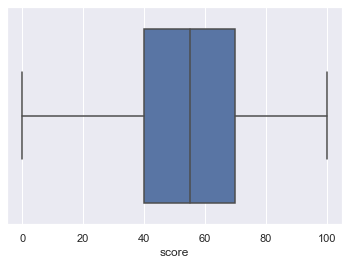

In [312]:
sns.boxplot(stud['score'])

Оценка 0 имеет довольно большой показатель: 36. Учитывая, что сдать госэкзамен на 0 практически невозможно: скорее всего эти ученики е явились на экзамен, и их не нужно учитывать в общем анализе. Пока что я оставлю этот столбец без изменений, но буду помнить, что при дальнейшем анализе либо нужно будет выбросить нулевые значения, либо заменить.

In [313]:
stud.corr()

,age,Medu,Fedu,traveltime,studytime,failures,granular,famrel,freetime,goout,health,absences,score
age,1.000000,-0.175695,-0.176086,0.097450,0.001226,0.196279,-0.001226,0.055997,0.034352,0.124846,-0.079473,0.181774,-0.153401
Medu,-0.175695,1.000000,0.635186,-0.195054,0.080794,-0.240355,-0.080794,-0.038375,0.012977,0.049164,-0.060558,0.097130,0.207606
Fedu,-0.176086,0.635186,1.000000,-0.156332,-0.006118,-0.283411,0.006118,-0.047367,-0.023049,0.037757,0.020853,0.000146,0.109354
traveltime,0.097450,-0.195054,-0.156332,1.000000,-0.106902,0.088318,0.106902,-0.038980,-0.005552,0.034325,-0.006795,-0.037818,-0.078114
studytime,0.001226,0.080794,-0.006118,-0.106902,1.000000,-0.164035,-1.000000,0.018768,-0.131154,-0.037142,-0.085194,-0.080193,0.110707
failures,0.196279,-0.240355,-0.283411,0.088318,-0.164035,1.000000,0.164035,0.030090,0.114721,0.102381,0.066944,0.080273,-0.334588
granular,-0.001226,-0.080794,0.006118,0.106902,-1.000000,0.164035,1.000000,-0.018768,0.131154,0.037142,0.085194,0.080193,-0.110707
famrel,0.055997,-0.038375,-0.047367,-0.038980,0.018768,0.030090,-0.018768,1.000000,0.176973,0.081749,0.099945,-0.098441,0.055752
freetime,0.034352,0.012977,-0.023049,-0.005552,-0.131154,0.114721,0.131154,0.176973,1.000000,0.289260,0.054244,0.056551,0.020780
goout,0.124846,0.049164,0.037757,0.034325,-0.037142,0.102381,0.037142,0.081749,0.289260,1.000000,0.004543,0.115019,-0.133748


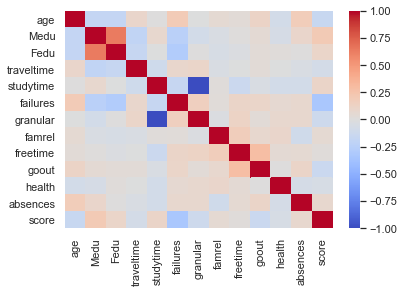

In [314]:
correlation = stud.corr()
sns.heatmap(correlation, cmap = 'coolwarm')


In [315]:
# удаляем стобец "granular", т.к. он почти полностью коррелирует со "studytime"
stud.drop(['granular'], inplace = True, axis = 1)

In [316]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 368 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      368 non-null    object 
 1   sex         368 non-null    object 
 2   age         368 non-null    int64  
 3   address     353 non-null    object 
 4   famsize     345 non-null    object 
 5   Pstatus     330 non-null    object 
 6   Medu        365 non-null    float64
 7   Fedu        345 non-null    float64
 8   Mjob        368 non-null    object 
 9   Fjob        368 non-null    object 
 10  reason      351 non-null    object 
 11  guardian    338 non-null    object 
 12  traveltime  340 non-null    float64
 13  studytime   363 non-null    float64
 14  failures    348 non-null    float64
 15  schoolsup   359 non-null    object 
 16  famsup      332 non-null    object 
 17  paid        329 non-null    object 
 18  activities  354 non-null    object 
 19  nursery     352 non-null    o

In [317]:
#Попробуем удалить больше строк с пустыми значениями, чтобы уточнить датафрейм:
#для начала удалим нулевые значения из стобца score

stud = stud.dropna(subset=['score'])


In [318]:
stud.loc[:, ['score']].info() #сократилось кол-во строк на 5

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   score   363 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [319]:
#хоть столбцы Medu и Fedu являются количественными, на самом деле они номинативные. Удалим из числовых, т.е. влияющих в корреляционном анализе. Приведем в соответствие:
def replace_count_to_text(x):
    x = x.replace('0.0', 'нет')
    x = x.replace('1.0', '4 класса')
    x = x.replace('2.0', '9 классов')
    x = x.replace('3.0', 'сред-спец')
    x = x.replace('4.0', 'высш')
    return x

stud.Medu = stud.Medu.astype(str).apply(replace_count_to_text)
stud.Fedu = stud.Fedu.astype(str).apply(replace_count_to_text)


In [320]:
stud.loc[:, ['Medu']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 394
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Medu    363 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


Столбец failures для простоты восприятия мы разделим на два значения: успешный и неуспешный. Будем так описывать детей, 
которые за пределами школы уверенные в себе или косячат.Вообще условие написано плохо, т.к. значение 0 может быть у ученика, у которого нет неудач или у него 30 неудач. Поэтому этот столбец держим под контролем, похоже что он вообще ничего не отражает

In [321]:
def replace_failures(x):
    if x == 3.0 or x ==2.0 or x ==1.0:
        x = x.replace(x, 'успешный')
    else:
        x = x.replace(x, 'неуспешный')
    return x

stud.failures = stud.failures.astype(str).apply(replace_failures)

In [322]:
stud.loc[:, ['failures']].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 394
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   failures  363 non-null    object
dtypes: object(1)
memory usage: 5.7+ KB


In [323]:
stud.failures

0      неуспешный
1      неуспешный
2      неуспешный
3      неуспешный
4      неуспешный
          ...    
389    неуспешный
391    неуспешный
392    неуспешный
393    неуспешный
394    неуспешный
Name: failures, Length: 363, dtype: object

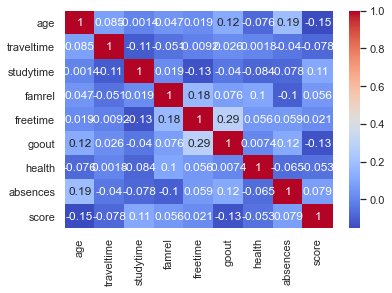

In [324]:
#посмотрим что получилось:
correlation = stud.corr()
sns.heatmap(correlation, annot = True, cmap = 'coolwarm')

Теперь приступим к анализу номиативных переменных

In [325]:
stud.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 363 entries, 0 to 394
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   school      363 non-null    object 
 1   sex         363 non-null    object 
 2   age         363 non-null    int64  
 3   address     349 non-null    object 
 4   famsize     340 non-null    object 
 5   Pstatus     325 non-null    object 
 6   Medu        363 non-null    object 
 7   Fedu        363 non-null    object 
 8   Mjob        363 non-null    object 
 9   Fjob        363 non-null    object 
 10  reason      346 non-null    object 
 11  guardian    333 non-null    object 
 12  traveltime  335 non-null    float64
 13  studytime   358 non-null    float64
 14  failures    363 non-null    object 
 15  schoolsup   354 non-null    object 
 16  famsup      328 non-null    object 
 17  paid        325 non-null    object 
 18  activities  349 non-null    object 
 19  nursery     348 non-null    o

In [326]:
def get_stat_dif(column):
    cols = stud.loc[:, column].value_counts().index[:]
    combinations_all = list(combinations(cols, 2))
    for comb in combinations_all:
        if ttest_ind(stud.loc[stud.loc[:, column] == comb[0], 'score'], 
                        stud.loc[stud.loc[:, column] == comb[1], 'score']).pvalue \
            <= 0.05/len(combinations_all): # Учли поправку Бонферони
            print('Найдены статистически значимые различия для колонки', column)
            break

In [327]:
for col in ['health', 'romantic', 'internet', 'higher', 'nursery', 'activities', 
           'paid', 'famsup', 'schoolsup', 'failures', 'reason', 'Fjob', 'Mjob', 'Medu', 'Fedu','Pstatus', 
            'famsize', 'sex', 'school']:
    get_stat_dif(col)

Найдены статистически значимые различия для колонки romantic
Найдены статистически значимые различия для колонки higher
Найдены статистически значимые различия для колонки paid
Найдены статистически значимые различия для колонки Mjob
Найдены статистически значимые различия для колонки Medu
Найдены статистически значимые различия для колонки sex


Итого работы:
1. Данные очищены согласно логике, многие значения оставлены нулевыми для последующего принятия решения об удалении либо замене их на среднее или моду
2. Выбросы найдены в столбце "Score", оставлю это для дальнейшего наблюдения
3. Из датафрейма удален полностью столбец "Granular", т.к. он дублировал столбец "Studityme"
4. Наблюдается положительная корреляция между столбцами "Studytime" и "Score", "Absenses" и "Score", что является воплне логичным, поэтому такие столбцы целесообразно оставить для дальнейшего изучения. Отрицательная корреляция между "Goout" и "Score" тоже выглядит вполне логично.


Найдены статистически значимые различия для колонки romantic. Посмотрим средние значения параметра score для учеников, состоящих в романтических отношениях и нет. 

In [328]:
score_inlove = stud[(stud['romantic'] == 'yes')].score.mean()
score_notinlove = stud[(stud['romantic'] == 'no')].score.mean()
print(f'Средний балл у влюбленных учеников {score_inlove} , а у невлюбленных {score_notinlove}')

Средний балл у влюбленных учеников 47.743362831858406 , а у невлюбленных 54.02272727272727


In [329]:
#получился похожий средний балл. Посмотрим сколько влюбленных не пришли на экзамен:
romantic_absense = stud[(stud['romantic'] == 'yes')].score.value_counts()
romantic_absense

0.0     18
55.0    13
65.0    11
60.0    11
45.0    10
50.0    10
70.0     8
75.0     8
80.0     7
40.0     6
35.0     5
25.0     2
30.0     2
90.0     1
20.0     1
Name: score, dtype: int64

Ровно половина из непришедших \ несдавших: влюбленные. Значит нулевое значение не искажает статистику. Средний бал не слишком завити от наличия романтических отношений.

Найдены статистически значимые различия для колонки higher. Посмотрим средние значения параметра score для учеников, в зависимости от их стремлений получить высшее образование. 

In [330]:
score_higher = stud[(stud['higher'] == 'yes')].score.mean()
score_nohigher = stud[(stud['higher'] == 'no')].score.mean()
print(f'Средний балл у учеников, желающих поступить в высшее уч.заведение: {score_higher} , а у нежелающих: {score_nohigher}')

Средний балл у учеников, желающих поступить в высшее уч.заведение: 52.72036474164134 , а у нежелающих: 34.6875


In [331]:
#Логично, что у тех, кто хочет поступить в высшее учебное заведение, балл выше.Теперь посмотрим на посещаемость ЕГЭ:
absense_nohigher = stud[(stud['higher'] == 'no')].score.value_counts()
absense_nohigher

0.0     5
60.0    3
50.0    3
40.0    2
65.0    1
35.0    1
45.0    1
Name: score, dtype: int64

Итак мы видим, что из 36 возможно отсутствующих учеников на ЕГЭ, только 5 непришедших из тех, кто не стремится получить высшее образование. Этого говорит о том, что на самом деле средний бал стремящихся получить высшее образование выше, чем ранее полуенное значение (52.668), т.е. статистику исказло большое кол-во нулевых значений.
Можно сделать вывод, что стремление получить высшее образование реально влияет на итоговый балл.

Найдены статистически значимые различия для колонки Mjob. Посмотрим средние значения параметра score для учеников, работа матери (маловероятно).

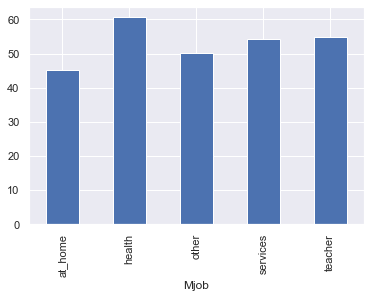

In [332]:
stud.groupby(by = 'Mjob')['score'].mean().plot(kind = 'bar', grid = True)

Не слишком сильные различия, но можно предположить, что у матерей домохозяек дети сдают математику чуть хуже остальных

Найдены статистически значимые различия для колонки Medu. Аналогичным способом посмотрим распределение среднего балла исходя из образования матери.

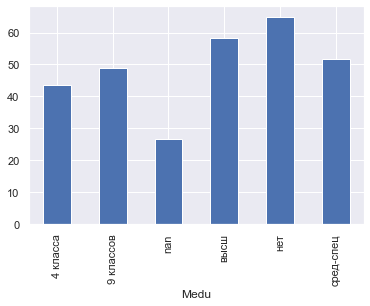

In [333]:
stud.groupby(by = 'Medu')['score'].mean().plot(kind = 'bar', grid = True)

Ваще никакой логики)))

Найдены статистически значимые различия для колонки sex.

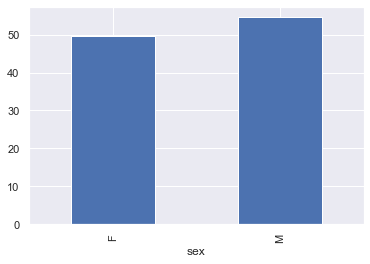

In [334]:
stud.groupby(by = 'sex')['score'].mean().plot(kind = 'bar', grid = True)

Итак, видимо, необходимо анализировать различные сочетания признаков. По одному из признаков нельзя однозначно сделать вывод об успеваемости ученика

Из номинативных данных целесообразно оставить столбцы, для которых найдеты существенные статистические различия.